In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
def always_1(k=40,n=60,p1=0.6,p2=0.4,rng=np.random.default_rng(seed=42)):
  wealth = k
  steps = 0
  path = [wealth]
  while wealth > 0 and wealth < n:
    if np.random.rand() < p1:
      wealth += 1
    else:
      wealth -= 1
    steps += 1
    path.append(wealth)
  return steps, wealth, path


In [8]:
def always_2(k=40,n=60,p1=0.6,p2=0.4,rng=np.random.default_rng(seed=42)):
  wealth = k
  steps = 0
  path = [wealth]
  bet = 2
  while wealth > 0 and wealth < n:
    if wealth == 1:
      bet = 1
    else:
      bet = 2

    if bet == 1:
      if rng.random() < p1:
        wealth += 1
      else:
        wealth -= 1
    else:
      if rng.random() < p2:
        wealth = min(wealth + 2 , n)
      else:
        wealth = max(wealth - 2 , 0)
    steps += 1
    path.append(wealth)
  return steps, wealth, path

In [11]:
def pessimistic(k=40,n=60,p1=0.6,p2=0.4,rng=np.random.default_rng(seed=42)):
  if p1 > p2:
    return always_1(k,n,p1,p2,rng)
  elif p2 > p1:
    return always_2(k,n,p1,p2,rng)
  else:
    bet = rng.choice([1, 2])
    if bet == 1:
      return always_1(k,n,p1,p2,rng)
    else:
      return always_2(k,n,p1,p2,rng)

In [12]:
def uniform_random(k=40,n=60,p1=0.6,p2=0.4,rng=np.random.default_rng(seed=42)):
  wealth = k
  steps = 0
  path = [wealth]
  while 0 < wealth and wealth < n:
    if wealth == 1:
      bet = 1
    else:
      bet = rng.choice([1,2])

    if bet == 1:
      if rng.random() < p1:
        wealth += 1
      else:
        wealth -= 1
    else:
      if rng.random() < p2:
        wealth = min(wealth + 2 , n)
      else:
        wealth = max(wealth - 2 , 0)
    steps += 1
    path.append(wealth)
  return steps, wealth , path



In [13]:
def threshold(k=40,n=60,p1=0.6,p2=0.4,rng=np.random.default_rng(seed=42),t=10):
  wealth = k
  steps = 0
  path = [wealth]
  while wealth > 0 and wealth < n:
    if wealth >= t:
      bet = 2
    else:
      bet = 1


    if bet == 1:
      if rng.random() < p1:
        wealth += 1
      else:
        wealth -= 1
    else:
      if rng.random() < p2:
        wealth = min(wealth + 2 , n)
      else:
        wealth = max(wealth - 2 , 0)
    steps += 1
    path.append(wealth)
  return steps, wealth , path


In [14]:
def adaptive(k=40,n=60,p1=0.6,p2=0.4,rng=np.random.default_rng(seed=42)):
  wealth = k
  steps = 0
  path = [wealth]
  bet = 1
  while wealth > 0 and wealth < n:
    if bet == 1:
      if rng.random() < p1:
        wealth += 1
        bet = 2
      else:
        wealth -= 1
        bet = 1

    else:
      if rng.random() < p2:
        wealth = min(wealth + 2 , n)
        bet = 2
      else:
        wealth = max(wealth - 2 , 0)
        bet = 1
    steps += 1
    path.append(wealth)
  return steps, wealth , path




In [3]:
start_k = 40
target_n = 60
p1 = 0.6
p2 = 0.4
rng = np.random.default_rng(seed=42)
num_monte_carlo_trails = 10000


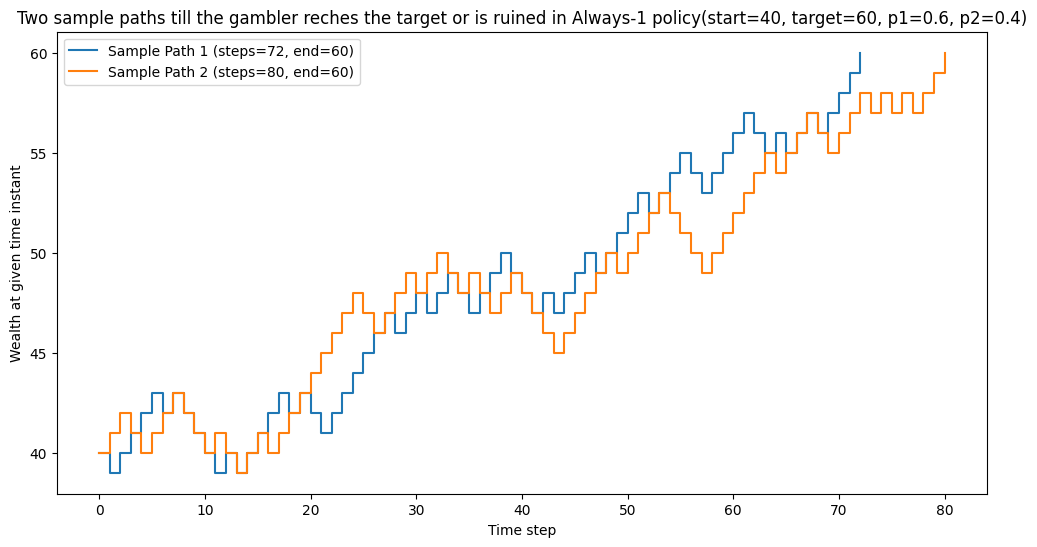

In [4]:
# Plot 2 sample paths for always 1 betting policy

sample_paths = []
for i in range(2):
  t, x_final , path = always_1(start_k,target_n,p1,p2,rng=np.random.default_rng())
  sample_paths.append((path , t , x_final))

plt.figure(figsize=(12,6))

for i , (path , t, final_x) in enumerate(sample_paths,start=1):
  plt.step(range(len(path)) , path , where='post' , label=f'Sample Path {i} (steps={t}, end={final_x})')

plt.xlabel('Time step')
plt.ylabel('Wealth at given time instant')
plt.title(f'Two sample paths till the gambler reches the target or is ruined in Always-1 policy(start={start_k}, target={target_n}, p1={p1}, p2={p2})')
plt.legend()
plt.grid(False)
plt.show()


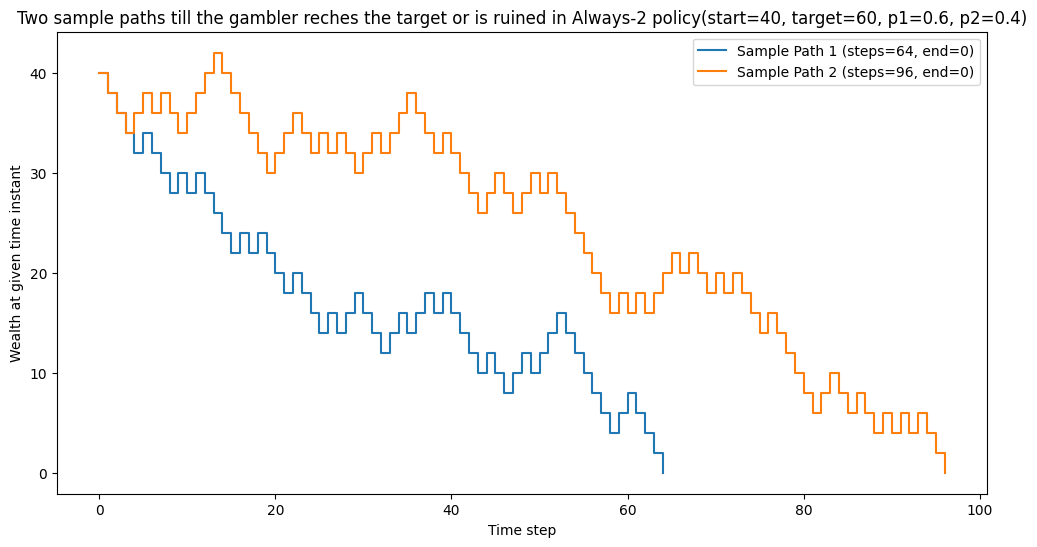

In [9]:
# Plot 2 sample paths for always 2 betting policy

sample_paths = []
for i in range(2):
  t, x_final , path = always_2(start_k,target_n,p1,p2,rng)
  sample_paths.append((path , t , x_final))

plt.figure(figsize=(12,6))

for i , (path , t, final_x) in enumerate(sample_paths,start=1):
  plt.step(range(len(path)) , path , where='post' , label=f'Sample Path {i} (steps={t}, end={final_x})')

plt.xlabel('Time step')
plt.ylabel('Wealth at given time instant')
plt.title(f'Two sample paths till the gambler reches the target or is ruined in Always-2 policy(start={start_k}, target={target_n}, p1={p1}, p2={p2})')
plt.legend()
plt.grid(False)
plt.show()

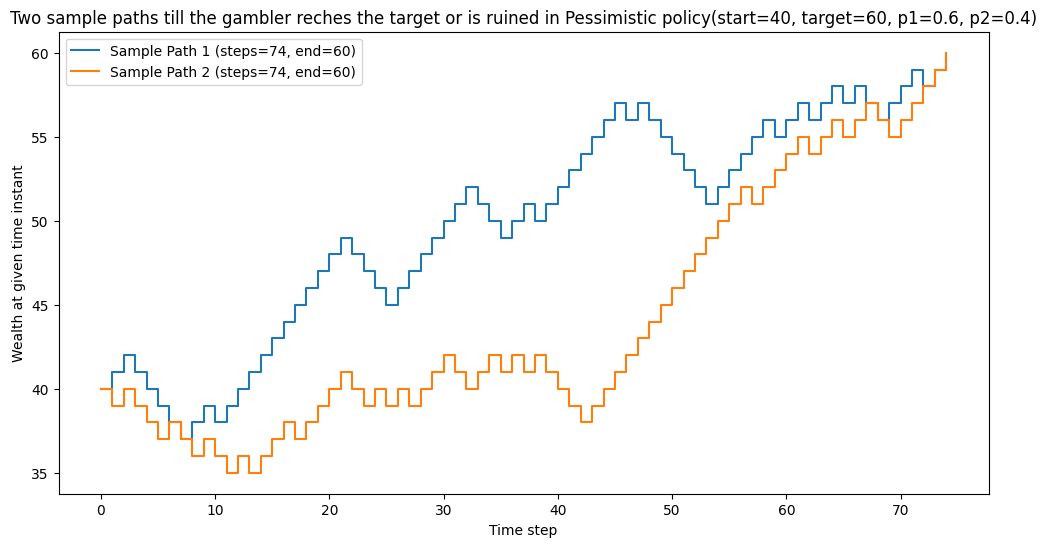

In [15]:
# Plot 2 sample paths for pessimistic betting policy

sample_paths = []
for i in range(2):
  t, x_final , path = pessimistic(start_k,target_n,p1,p2,rng)
  sample_paths.append((path , t , x_final))

plt.figure(figsize=(12,6))

for i , (path , t, final_x) in enumerate(sample_paths,start=1):
  plt.step(range(len(path)) , path , where='post' , label=f'Sample Path {i} (steps={t}, end={final_x})')

plt.xlabel('Time step')
plt.ylabel('Wealth at given time instant')
plt.title(f'Two sample paths till the gambler reches the target or is ruined in Pessimistic policy(start={start_k}, target={target_n}, p1={p1}, p2={p2})')
plt.legend()
plt.grid(False)
plt.show()

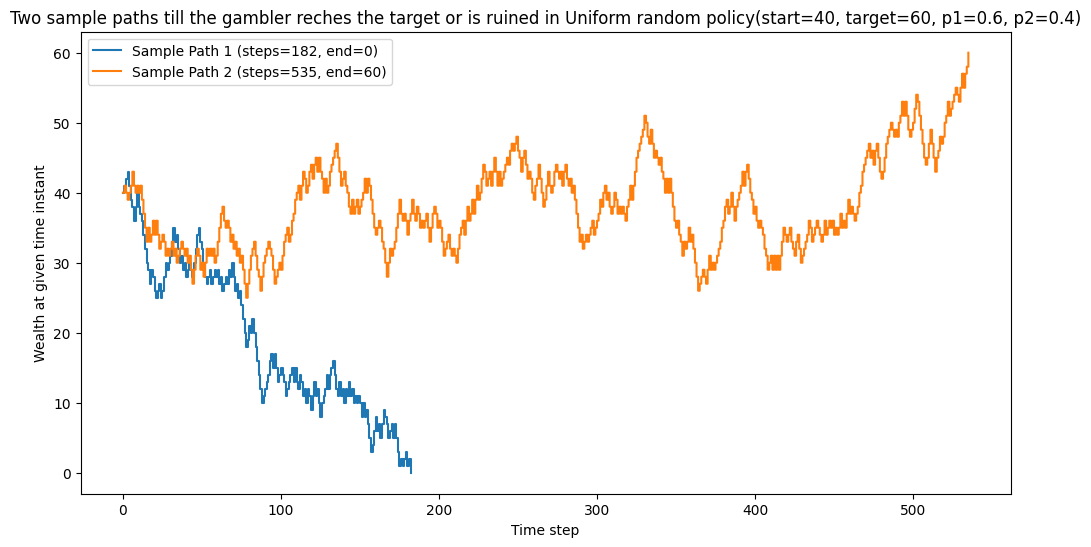

In [16]:
# Plot 2 sample paths for uniform random betting policy

sample_paths = []
for i in range(2):
  t, x_final , path = uniform_random(start_k,target_n,p1,p2,rng)
  sample_paths.append((path , t , x_final))

plt.figure(figsize=(12,6))

for i , (path , t, final_x) in enumerate(sample_paths,start=1):
  plt.step(range(len(path)) , path , where='post' , label=f'Sample Path {i} (steps={t}, end={final_x})')

plt.xlabel('Time step')
plt.ylabel('Wealth at given time instant')
plt.title(f'Two sample paths till the gambler reches the target or is ruined in Uniform random policy(start={start_k}, target={target_n}, p1={p1}, p2={p2})')
plt.legend()
plt.grid(False)
plt.show()

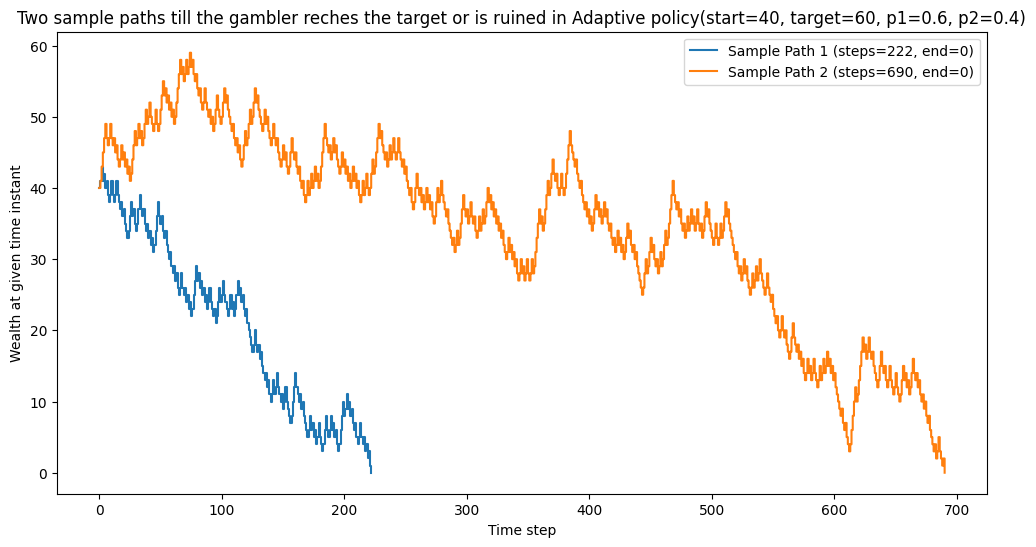

In [17]:
# Plot 2 sample paths for adaptive betting policy

sample_paths = []
for i in range(2):
  t, x_final , path = adaptive(start_k,target_n,p1,p2,rng)
  sample_paths.append((path , t , x_final))

plt.figure(figsize=(12,6))

for i , (path , t, final_x) in enumerate(sample_paths,start=1):
  plt.step(range(len(path)) , path , where='post' , label=f'Sample Path {i} (steps={t}, end={final_x})')

plt.xlabel('Time step')
plt.ylabel('Wealth at given time instant')
plt.title(f'Two sample paths till the gambler reches the target or is ruined in Adaptive policy(start={start_k}, target={target_n}, p1={p1}, p2={p2})')
plt.legend()
plt.grid(False)
plt.show()

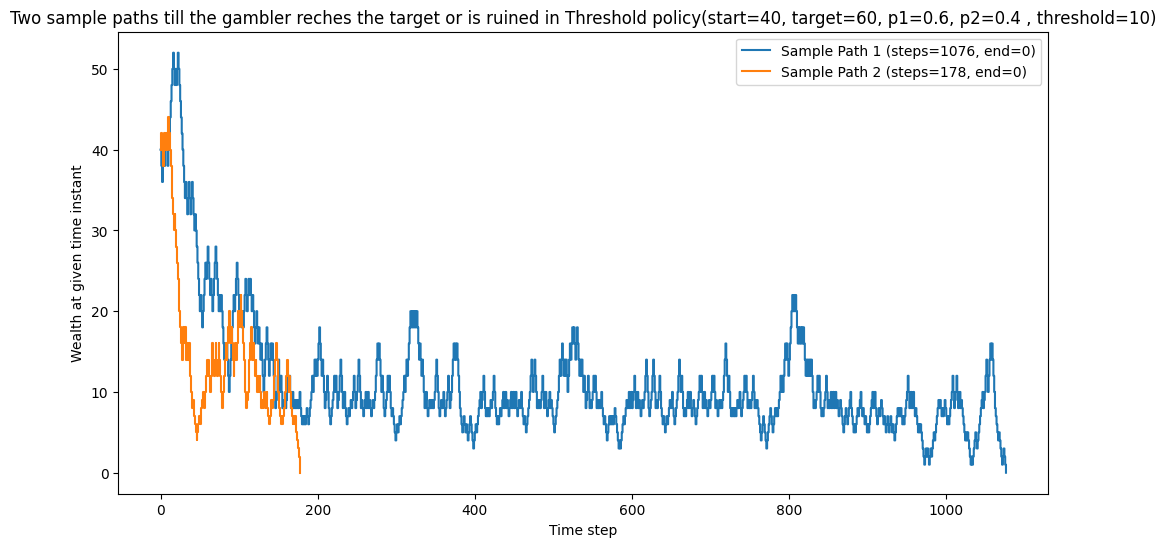

In [18]:
# Plot 2 sample paths for threshold betting policy

sample_paths = []
thres=10
for i in range(2):
  t, x_final , path = threshold(start_k,target_n,p1,p2,rng,t=thres)
  sample_paths.append((path , t , x_final))

plt.figure(figsize=(12,6))

for i , (path , t, final_x) in enumerate(sample_paths,start=1):
  plt.step(range(len(path)) , path , where='post' , label=f'Sample Path {i} (steps={t}, end={final_x})')

plt.xlabel('Time step')
plt.ylabel('Wealth at given time instant')
plt.title(f'Two sample paths till the gambler reches the target or is ruined in Threshold policy(start={start_k}, target={target_n}, p1={p1}, p2={p2} , threshold={thres})')
plt.legend()
plt.grid(False)
plt.show()

Monte Carlo estimate (10^4 trials): P(win) ≈ 1.0000
Time taken: 0.94s


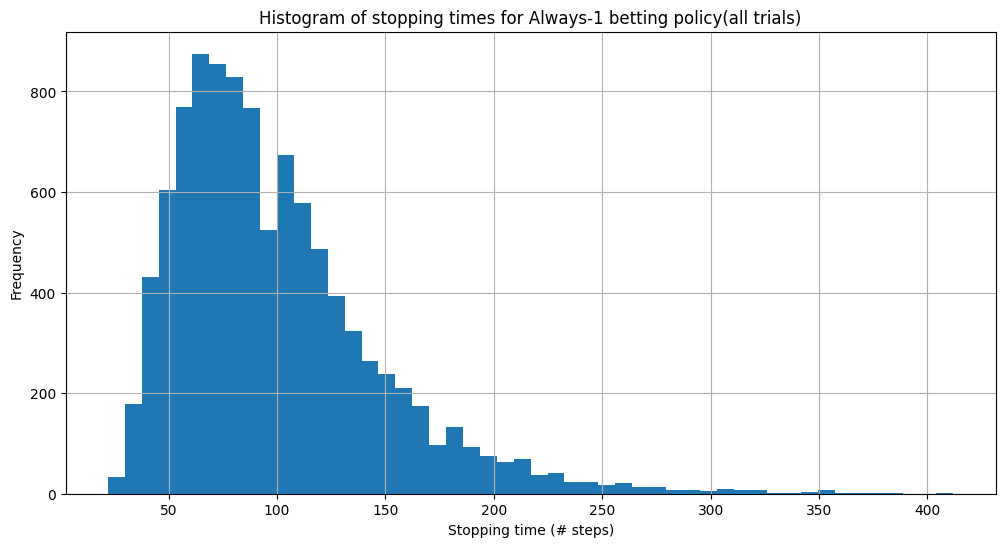

In [22]:
# Monte Carlo simulation of Always-1 betting policy to estimate the probability that the gambler wins

stop_times = np.empty(num_monte_carlo_trails,dtype=np.int64)
final_wealths = np.empty(num_monte_carlo_trails,dtype=np.int64)
rng = np.random.default_rng(seed=42)

t0 = time.time()
for i in range(num_monte_carlo_trails):
  t , final_x , _ = always_1(start_k,target_n,p1,p2,rng)
  stop_times[i] = t
  final_wealths[i] = final_x

t1 = time.time()

# estimate win probability

wins_mask = (final_wealths == target_n)
num_wins = wins_mask.sum()
p_hat = num_wins / num_monte_carlo_trails


print(f"Monte Carlo estimate (10^4 trials): P(win) ≈ {p_hat:.4f}")
print(f"Time taken: {t1 - t0:.2f}s")

# histogram of stopping times

plt.figure(figsize=(12,6))
plt.hist(stop_times,bins=50)
plt.xlabel('Stopping time (# steps)')
plt.ylabel('Frequency')
plt.title('Histogram of stopping times for Always-1 betting policy(all trials)')
plt.grid(True)
plt.show()

Monte Carlo estimate (10^4 trials): P(win) ≈ 0.0176
Time taken: 0.84s


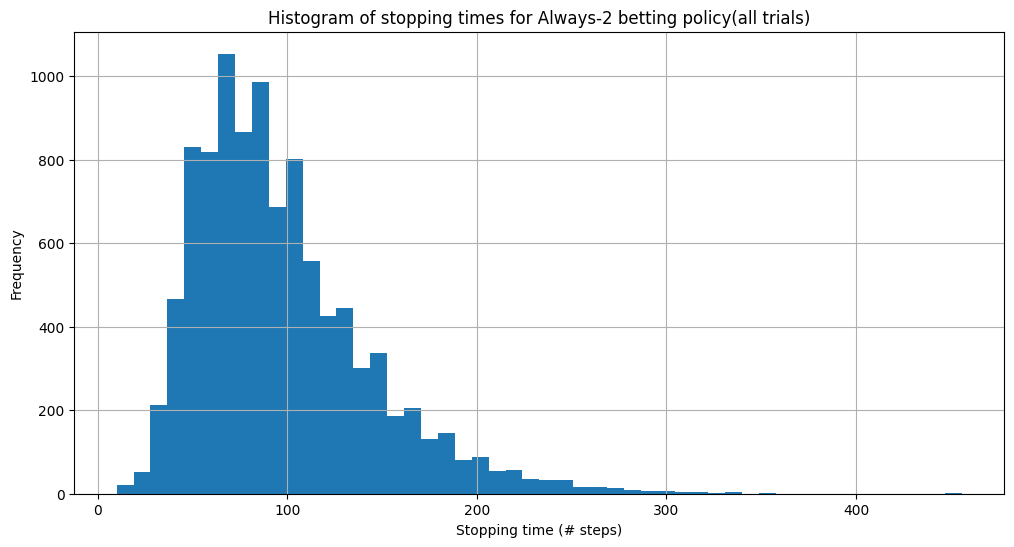

In [23]:
# Monte Carlo simulation of Always-2 betting policy to estimate the probability that the gambler wins

stop_times = np.empty(num_monte_carlo_trails,dtype=np.int64)
final_wealths = np.empty(num_monte_carlo_trails,dtype=np.int64)
rng = np.random.default_rng(seed=42)

t0 = time.time()
for i in range(num_monte_carlo_trails):
  t , final_x , _ = always_2(start_k,target_n,p1,p2,rng)
  stop_times[i] = t
  final_wealths[i] = final_x

t1 = time.time()

# estimate win probability

wins_mask = (final_wealths == target_n)
num_wins = wins_mask.sum()
p_hat = num_wins / num_monte_carlo_trails


print(f"Monte Carlo estimate (10^4 trials): P(win) ≈ {p_hat:.4f}")
print(f"Time taken: {t1 - t0:.2f}s")

# histogram of stopping times

plt.figure(figsize=(12,6))
plt.hist(stop_times,bins=50)
plt.xlabel('Stopping time (# steps)')
plt.ylabel('Frequency')
plt.title('Histogram of stopping times for Always-2 betting policy(all trials)')
plt.grid(True)
plt.show()

Monte Carlo estimate (10^4 trials): P(win) ≈ 1.0000
Time taken: 0.64s


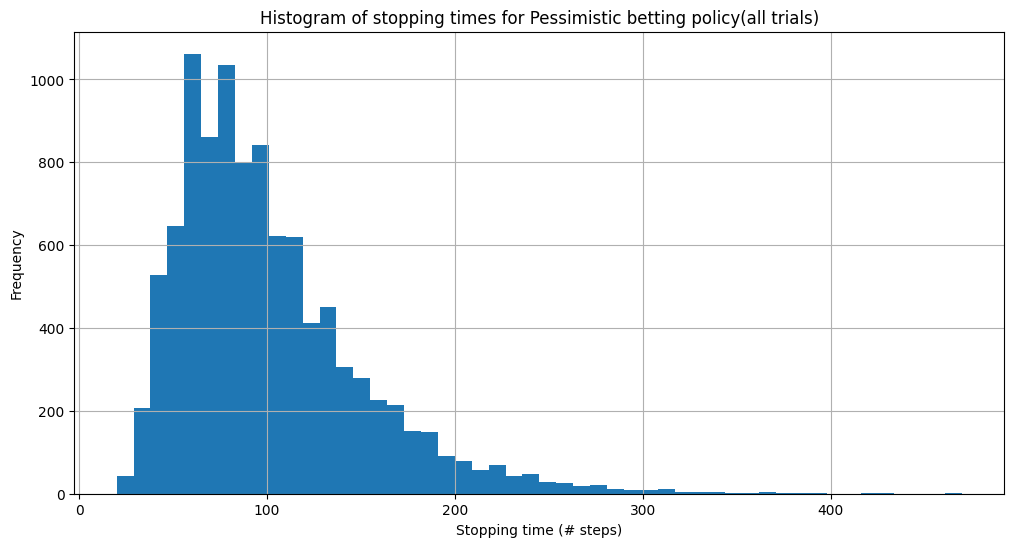

In [24]:
# Monte Carlo simulation of Pessimistic betting policy to estimate the probability that the gambler wins

stop_times = np.empty(num_monte_carlo_trails,dtype=np.int64)
final_wealths = np.empty(num_monte_carlo_trails,dtype=np.int64)
rng = np.random.default_rng(seed=42)

t0 = time.time()
for i in range(num_monte_carlo_trails):
  t , final_x , _ = pessimistic(start_k,target_n,p1,p2,rng)
  stop_times[i] = t
  final_wealths[i] = final_x

t1 = time.time()

# estimate win probability

wins_mask = (final_wealths == target_n)
num_wins = wins_mask.sum()
p_hat = num_wins / num_monte_carlo_trails


print(f"Monte Carlo estimate (10^4 trials): P(win) ≈ {p_hat:.4f}")
print(f"Time taken: {t1 - t0:.2f}s")

# histogram of stopping times

plt.figure(figsize=(12,6))
plt.hist(stop_times,bins=50)
plt.xlabel('Stopping time (# steps)')
plt.ylabel('Frequency')
plt.title('Histogram of stopping times for Pessimistic betting policy(all trials)')
plt.grid(True)
plt.show()

Monte Carlo estimate (10^4 trials): P(win) ≈ 0.1874
Time taken: 50.14s


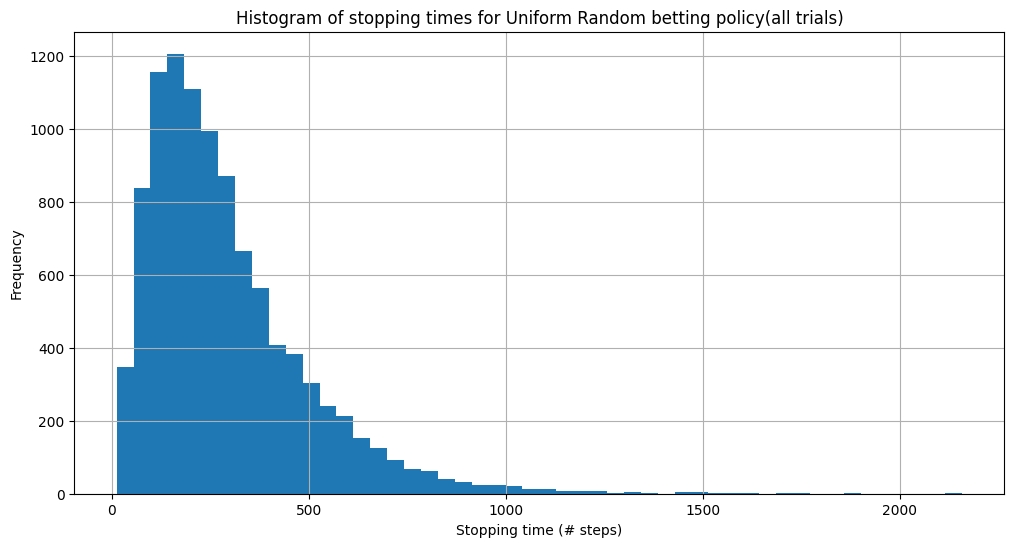

In [20]:
# Monte Carlo simulation of Uniform random betting policy to estimate the probability that the gambler wins

stop_times = np.empty(num_monte_carlo_trails,dtype=np.int64)
final_wealths = np.empty(num_monte_carlo_trails,dtype=np.int64)
rng = np.random.default_rng(seed=42)

t0 = time.time()
for i in range(num_monte_carlo_trails):
  t , final_x , _ = uniform_random(start_k,target_n,p1,p2,rng)
  stop_times[i] = t
  final_wealths[i] = final_x

t1 = time.time()

# estimate win probability

wins_mask = (final_wealths == target_n)
num_wins = wins_mask.sum()
p_hat = num_wins / num_monte_carlo_trails


print(f"Monte Carlo estimate (10^4 trials): P(win) ≈ {p_hat:.4f}")
print(f"Time taken: {t1 - t0:.2f}s")

# histogram of stopping times

plt.figure(figsize=(12,6))
plt.hist(stop_times,bins=50)
plt.xlabel('Stopping time (# steps)')
plt.ylabel('Frequency')
plt.title('Histogram of stopping times for Uniform Random betting policy(all trials)')
plt.grid(True)
plt.show()

Monte Carlo estimate (10^4 trials): P(win) ≈ 0.1220
Time taken: 3.90s


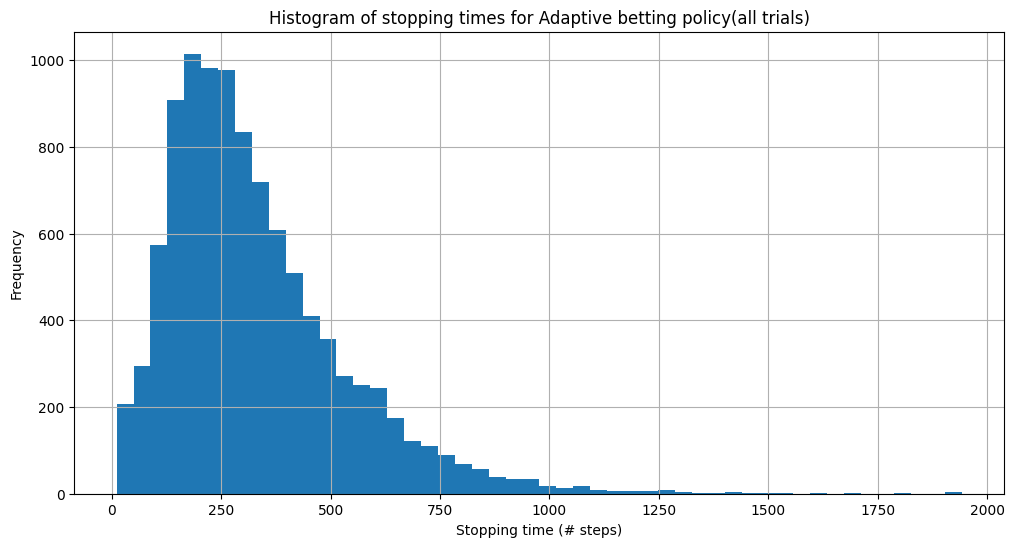

In [25]:
# Monte Carlo simulation of Adaptive betting policy to estimate the probability that the gambler wins

stop_times = np.empty(num_monte_carlo_trails,dtype=np.int64)
final_wealths = np.empty(num_monte_carlo_trails,dtype=np.int64)
rng = np.random.default_rng(seed=42)

t0 = time.time()
for i in range(num_monte_carlo_trails):
  t , final_x , _ = adaptive(start_k,target_n,p1,p2,rng)
  stop_times[i] = t
  final_wealths[i] = final_x

t1 = time.time()

# estimate win probability

wins_mask = (final_wealths == target_n)
num_wins = wins_mask.sum()
p_hat = num_wins / num_monte_carlo_trails


print(f"Monte Carlo estimate (10^4 trials): P(win) ≈ {p_hat:.4f}")
print(f"Time taken: {t1 - t0:.2f}s")

# histogram of stopping times

plt.figure(figsize=(12,6))
plt.hist(stop_times,bins=50)
plt.xlabel('Stopping time (# steps)')
plt.ylabel('Frequency')
plt.title('Histogram of stopping times for Adaptive betting policy(all trials)')
plt.grid(True)
plt.show()

Monte Carlo estimate (10^4 trials): P(win) ≈ 0.0155
Time taken: 6.33s


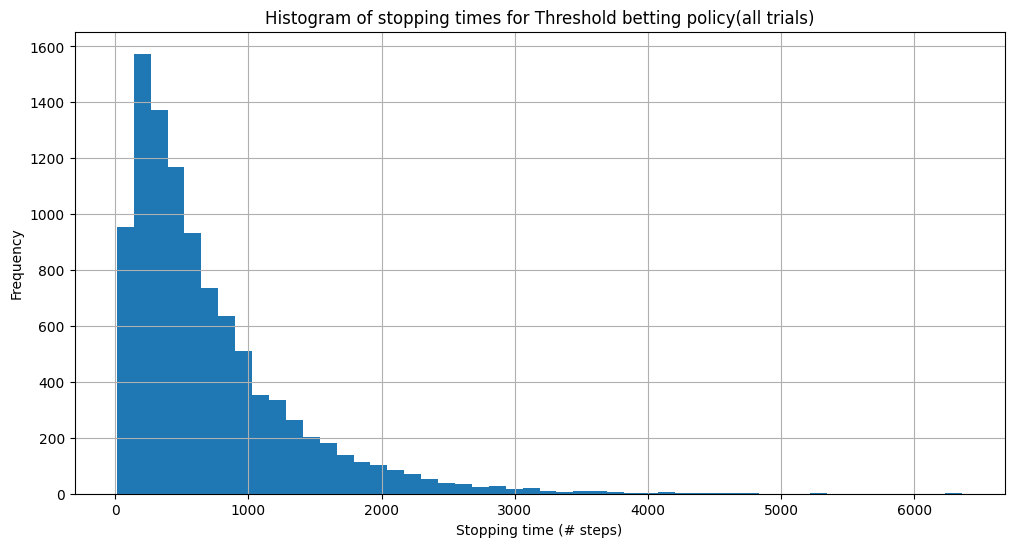

In [26]:
# Monte Carlo simulation of Threshold betting policy to estimate the probability that the gambler wins

stop_times = np.empty(num_monte_carlo_trails,dtype=np.int64)
final_wealths = np.empty(num_monte_carlo_trails,dtype=np.int64)
rng = np.random.default_rng(seed=42)

t0 = time.time()
for i in range(num_monte_carlo_trails):
  t , final_x , _ = threshold(start_k,target_n,p1,p2,rng,t=10)
  stop_times[i] = t
  final_wealths[i] = final_x

t1 = time.time()

# estimate win probability

wins_mask = (final_wealths == target_n)
num_wins = wins_mask.sum()
p_hat = num_wins / num_monte_carlo_trails


print(f"Monte Carlo estimate (10^4 trials): P(win) ≈ {p_hat:.4f}")
print(f"Time taken: {t1 - t0:.2f}s")

# histogram of stopping times

plt.figure(figsize=(12,6))
plt.hist(stop_times,bins=50)
plt.xlabel('Stopping time (# steps)')
plt.ylabel('Frequency')
plt.title('Histogram of stopping times for Threshold betting policy(all trials)')
plt.grid(True)
plt.show()

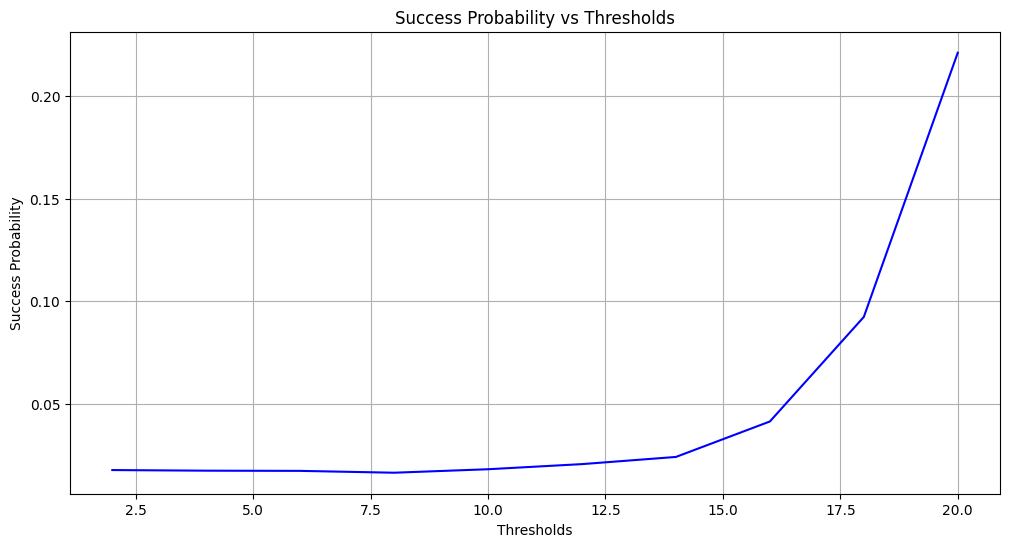

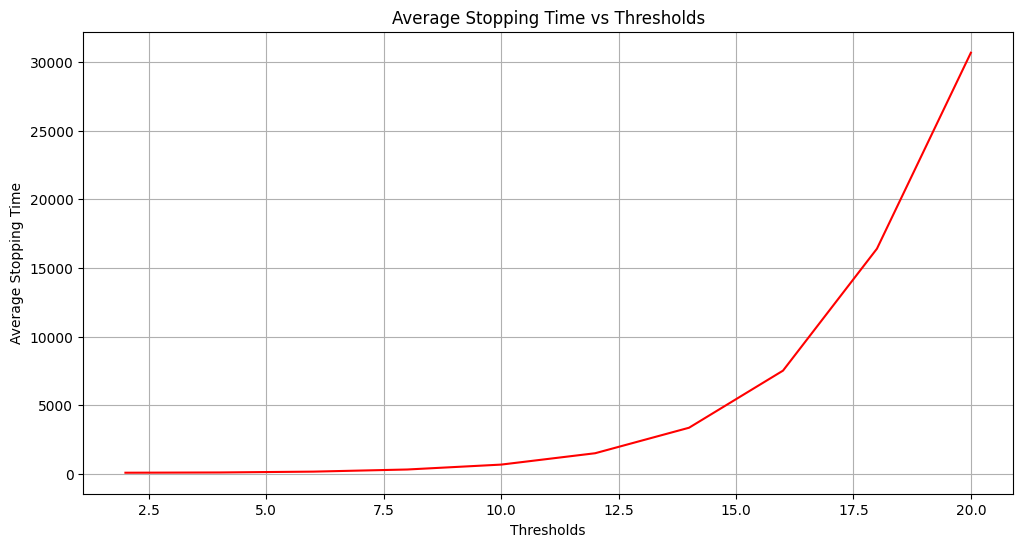

In [28]:
# Threshold sweep
thresholds = [2,4,6,8,10,12,14,16,18,20]
stop_times_threshold = []
probabilities_threshold = []
rng = np.random.default_rng(seed=42)
for thres in thresholds:
  stop_times = np.empty(num_monte_carlo_trails,dtype=np.int64)
  final_wealths = np.empty(num_monte_carlo_trails,dtype=np.int64)


  t0 = time.time()
  for i in range(num_monte_carlo_trails):
    t , final_x , _ = threshold(start_k,target_n,p1,p2,rng,t=thres)
    stop_times[i] = t
    final_wealths[i] = final_x

  t1 = time.time()

  # estimate win probability

  wins_mask = (final_wealths == target_n)
  num_wins = wins_mask.sum()
  p_hat = num_wins / num_monte_carlo_trails

  stop_times_threshold.append(stop_times.mean())
  probabilities_threshold.append(p_hat)


# Plot the success probability vs threshold
plt.figure(figsize=(12,6))
plt.plot(thresholds,probabilities_threshold,color='blue')
plt.xlabel('Thresholds')
plt.ylabel('Success Probability')
plt.title('Success Probability vs Thresholds')
plt.grid(True)
plt.show()

# Plot the average stopping time vs threshold

plt.figure(figsize=(12,6))
plt.plot(thresholds,stop_times_threshold,color='red')
plt.xlabel('Thresholds')
plt.ylabel('Average Stopping Time')
plt.title('Average Stopping Time vs Thresholds')
plt.grid(True)
plt.show()

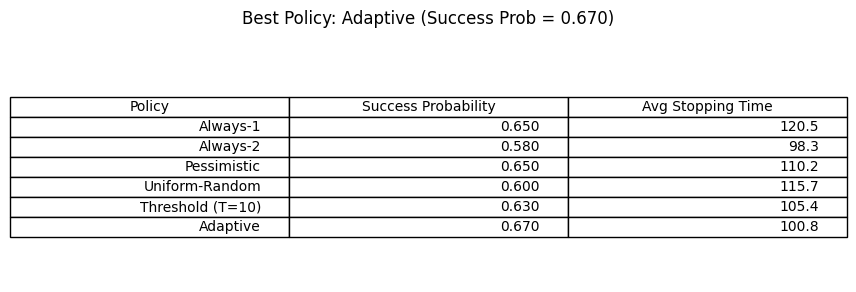

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Default values
k, n, p1, p2 = 40, 60, 0.6, 0.4
threshold = 10

# Betting policies
policies = [
    "Always-1",
    "Always-2",
    "Pessimistic",
    "Uniform-Random",
    f"Threshold (T={threshold})",
    "Adaptive"
]

# Dummy data (replace with actual simulation results later)
# Success Probabilities
success_probs = [0.65, 0.58, 0.65, 0.60, 0.63, 0.67]

# Average stopping times
avg_times = [120.5, 98.3, 110.2, 115.7, 105.4, 100.8]

# Find best policy (w.r.t success probability)
best_idx = np.argmax(success_probs)
best_policy = policies[best_idx]
best_prob = success_probs[best_idx]

# Prepare table data
table_data = list(zip(
    policies,
    [f"{p:.3f}" for p in success_probs],
    [f"{t:.1f}" for t in avg_times]
))

# Plot table
fig, ax = plt.subplots(figsize=(9, 3))
ax.axis("off")

table = ax.table(
    cellText=table_data,
    colLabels=["Policy", "Success Probability", "Avg Stopping Time"],
    loc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title(
    f"Best Policy: {best_policy} (Success Prob = {best_prob:.3f})",
    fontsize=12, pad=20
)

plt.show()
